In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scikitplot as skplt  # Corrected import statement for scikitplot
import os.path
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

IN_DIM = 300
CLASS_NUM = 5  # Updated to 5 classes
LEARN_RATE = 0.0001
TRAIN_STEP = 20000
tensorflow_tmp = "tmp_tensorflow"

def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.metrics.plot_confusion_matrix(yte, ypred, figsize=(8, 8))  # Updated to use the correct function path
    plt.show()

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(IN_DIM,)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(CLASS_NUM, activation='softmax')  # Ensure softmax for multi-class classification
    ])
    return model


In [10]:
train_data = np.load('./xtr_min.npy', allow_pickle=True)
eval_data = np.load('./xte_min.npy', allow_pickle=True)
train_labels = np.load('./ytr_min.npy', allow_pickle=True)
eval_labels = np.load('./yte_min.npy', allow_pickle=True)

print("Shape of train_data:", train_data.shape)
print("Shape of eval_data:", eval_data.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of eval_labels:", eval_labels.shape)

Shape of train_data: (137796,)
Shape of eval_data: (34449,)
Shape of train_labels: (137796,)
Shape of eval_labels: (34449,)


In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels to integer format
train_labels = label_encoder.fit_transform(train_labels)
# Transform the evaluation labels based on the fitted LabelEncoder
eval_labels = label_encoder.transform(eval_labels)

# Display the label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'Center': 0, 'Lean Left': 1, 'Lean Right': 2, 'Left': 3, 'Right': 4}


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Check if the data is a list of strings
if isinstance(train_data[0], str) and isinstance(eval_data[0], str):
    # Initialize the TF-IDF vectorizer with a limit on the number of features
    tfidf_vectorizer = TfidfVectorizer(max_features=300)

    # Fit the vectorizer on the training data and transform it
    train_data_tfidf = tfidf_vectorizer.fit_transform(train_data)

    # Transform the evaluation data using the same vectorizer
    eval_data_tfidf = tfidf_vectorizer.transform(eval_data)

    # Print the shape of the transformed data
    print("Shape of train_data_tfidf:", train_data_tfidf.shape)
    print("Shape of eval_data_tfidf:", eval_data_tfidf.shape)
else:
    print("Data is not in the correct format (expected list of text strings). Check your data loading and formatting.")


Shape of train_data_tfidf: (137796, 300)
Shape of eval_data_tfidf: (34449, 300)


C:\Users\sreed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2756/2756 - 10s - 4ms/step - accuracy: 0.3930 - loss: 1.3966 - val_accuracy: 0.5074 - val_loss: 1.2281
Epoch 2/20
2756/2756 - 9s - 3ms/step - accuracy: 0.4973 - loss: 1.2416 - val_accuracy: 0.5478 - val_loss: 1.1440
Epoch 3/20
2756/2756 - 8s - 3ms/step - accuracy: 0.5304 - loss: 1.1753 - val_accuracy: 0.5712 - val_loss: 1.0953
Epoch 4/20
2756/2756 - 8s - 3ms/step - accuracy: 0.5544 - loss: 1.1283 - val_accuracy: 0.5876 - val_loss: 1.0581
Epoch 5/20
2756/2756 - 8s - 3ms/step - accuracy: 0.5721 - loss: 1.0890 - val_accuracy: 0.6060 - val_loss: 1.0233
Epoch 6/20
2756/2756 - 8s - 3ms/step - accuracy: 0.5877 - loss: 1.0557 - val_accuracy: 0.6194 - val_loss: 0.9923
Epoch 7/20
2756/2756 - 8s - 3ms/step - accuracy: 0.6035 - loss: 1.0223 - val_accuracy: 0.6349 - val_loss: 0.9633
Epoch 8/20
2756/2756 - 8s - 3ms/step - accuracy: 0.6178 - loss: 0.9915 - val_accuracy: 0.6458 - val_loss: 0.9351
Epoch 9/20
2756/2756 - 8s - 3ms/step - accuracy: 0.6302 - loss: 0.9623 - val_accuracy: 0.6589 -

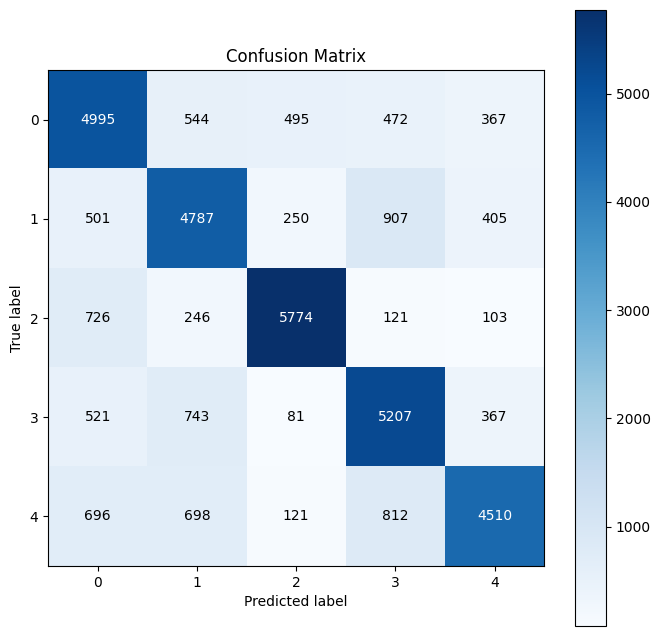

In [16]:
# Define the model
model = create_model()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data_tfidf, train_labels, epochs=20, batch_size=50,
                    validation_data=(eval_data_tfidf, eval_labels), verbose=2)

# Evaluate the model
eval_loss, eval_acc = model.evaluate(eval_data_tfidf, eval_labels)
print('Evaluation accuracy:', eval_acc)

# Predict and plot confusion matrix
y_pred = np.argmax(model.predict(eval_data_tfidf), axis=1)
plot_cmat(eval_labels, y_pred)

# Save the model
model.save('tensorflow_model.h5')  # Saves as an HDF5 file

1077/1077 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7356 - loss: 0.7364
Evaluation accuracy: 0.7336352467536926
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


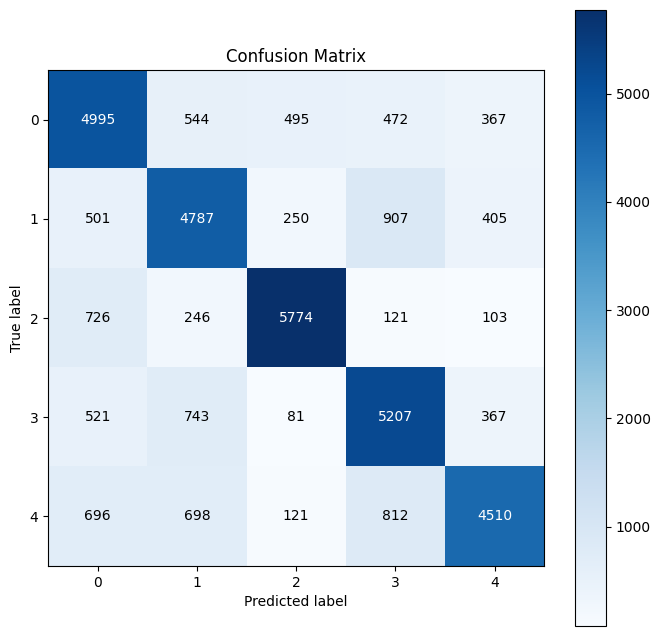

In [17]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model('tensorflow_model.h5')

# Evaluate the model
eval_loss, eval_acc = model.evaluate(eval_data_tfidf, eval_labels)
print('Evaluation accuracy:', eval_acc)

# Predict and plot confusion matrix
y_pred = np.argmax(model.predict(eval_data_tfidf), axis=1)
plot_cmat(eval_labels, y_pred)

Shape of new_train_data: (137796,)
Shape of new_eval_data: (34449,)
Shape of new_train_labels: (137796,)
Shape of new_eval_labels: (34449,)


C:\Users\sreed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2061 - loss: 1.6092
Epoch 2/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2472 - loss: 1.6077
Epoch 3/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2881 - loss: 1.6016
Epoch 4/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3136 - loss: 1.5441
Epoch 5/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3317 - loss: 1.4434
Epoch 6/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3443 - loss: 1.4211
Epoch 7/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3633 - loss: 1.4049
Epoch 8/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3831 - loss: 1.3913
Epoch 9/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3940 - loss: 1.3834
Epoch 10/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4036 - loss: 1.3705
Epoch 11/20
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4138 - loss: 1.3601
Epoch 12/20
2154/2154 ━━━━━━━━

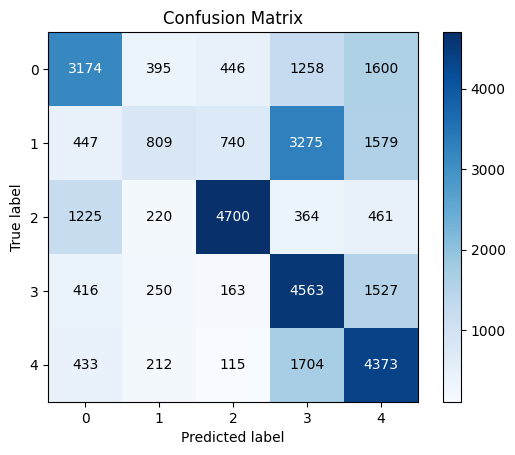

In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data again
new_train_data = np.load('./xtr_min.npy', allow_pickle=True)
new_eval_data = np.load('./xte_min.npy', allow_pickle=True)
new_train_labels = np.load('./ytr_min.npy', allow_pickle=True)
new_eval_labels = np.load('./yte_min.npy', allow_pickle=True)

# Check data shapes
print("Shape of new_train_data:", new_train_data.shape)
print("Shape of new_eval_data:", new_eval_data.shape)
print("Shape of new_train_labels:", new_train_labels.shape)
print("Shape of new_eval_labels:", new_eval_labels.shape)

# Assuming the data is textual and needs TF-IDF processing
if isinstance(new_train_data[0], str):
    tfidf_vectorizer = TfidfVectorizer(max_features=300)
    new_train_data = tfidf_vectorizer.fit_transform(new_train_data)
    new_eval_data = tfidf_vectorizer.transform(new_eval_data)

# Encoding labels
label_encoder = LabelEncoder()
new_train_labels_encoded = label_encoder.fit_transform(new_train_labels)
new_train_labels_onehot = to_categorical(new_train_labels_encoded, num_classes=5)

new_eval_labels_encoded = label_encoder.transform(new_eval_labels)
new_eval_labels_onehot = to_categorical(new_eval_labels_encoded, num_classes=5)

# Define the model
def get_model(input_dim, num_classes):
    model = Sequential([
        Dense(256, input_dim=input_dim, activation='relu', kernel_initializer='normal'),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_initializer='normal'),
        Dropout(0.5),
        Dense(80, activation='relu', kernel_initializer='normal'),
        Dense(num_classes, activation="softmax", kernel_initializer='normal')
    ])
    sgd = SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

model = get_model(new_train_data.shape[1], 5)  # Ensure to match the number of features and classes

# Train the model
history = model.fit(new_train_data.toarray(), new_train_labels_onehot, epochs=20, batch_size=64, verbose=1)
print("Model Trained!")

# Evaluate the model
score = model.evaluate(new_eval_data.toarray(), new_eval_labels_onehot, verbose=0)
print("\nAccuracy = {:.2f}%".format(score[1] * 100))

# Predict and plot
probabilities = model.predict(new_eval_data.toarray())
predicted_classes = np.argmax(probabilities, axis=1)
plot_cmat(new_eval_labels_encoded, predicted_classes)


In [23]:
model.save('keras_model.h5')


Accuracy = 51.15%
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step


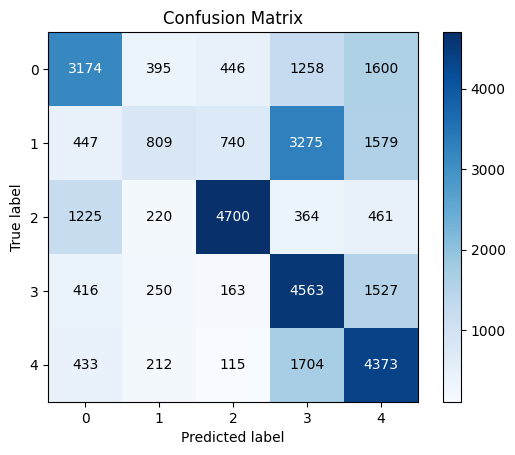

In [24]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model('keras_model.h5')

score = model.evaluate(new_eval_data.toarray(), new_eval_labels_onehot, verbose=0)
print("\nAccuracy = {:.2f}%".format(score[1] * 100))

# Predict and plot
probabilities = model.predict(new_eval_data.toarray())
predicted_classes = np.argmax(probabilities, axis=1)
plot_cmat(new_eval_labels_encoded, predicted_classes)

In [29]:
import numpy as np
from collections import Counter
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Load data
xtr = np.load('./xtr_min.npy', allow_pickle=True)
xte = np.load('./xte_min.npy', allow_pickle=True)
y_train = np.load('./ytr_min.npy', allow_pickle=True)
y_test = np.load('./yte_min.npy', allow_pickle=True)

# Define constants
top_words = 5000
embedding_vector_length = 32
max_review_length = 500

# Tokenization and building the word index
cnt = Counter()
x_train = []
for x in xtr:
    words = x.split()
    x_train.append(words)
    for word in words:
        cnt[word] += 1

most_common = cnt.most_common(top_words)
word_bank = {word: i+1 for i, (word, _) in enumerate(most_common)}

# Encode the sentences
x_train = [[word_bank.get(word, 0) for word in sentence] for sentence in x_train]
x_test = [[word_bank.get(word, 0) for word in x.split()] for x in xte]

# Pad the sequences
X_train = pad_sequences(x_train, maxlen=max_review_length)
X_test = pad_sequences(x_test, maxlen=max_review_length)

# Encoding labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train = to_categorical(y_train, num_classes=5)

y_test = label_encoder.transform(y_test)
y_test = to_categorical(y_test, num_classes=5)

# Create the model
model = Sequential([
    Embedding(input_dim=top_words + 1, output_dim=embedding_vector_length, input_length=max_review_length),
    LSTM(100),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)  # Adjust epochs and batch size as needed

# Save the model if necessary
model.save('LSTM-model.h5')


Epoch 1/3


C:\Users\sreed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 399s 184ms/step - accuracy: 0.4537 - loss: 1.2794 - val_accuracy: 0.6039 - val_loss: 1.0182
Epoch 2/3
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 791s 367ms/step - accuracy: 0.6326 - loss: 0.9669 - val_accuracy: 0.6409 - val_loss: 0.9475
Epoch 3/3
2154/2154 ━━━━━━━━━━━━━━━━━━━━ 600s 279ms/step - accuracy: 0.6763 - loss: 0.8725 - val_accuracy: 0.6606 - val_loss: 0.9040


1077/1077 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.6616 - loss: 0.9065

Loss on test set: 0.9040399789810181
Accuracy on test set: 66.06%
1077/1077 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step


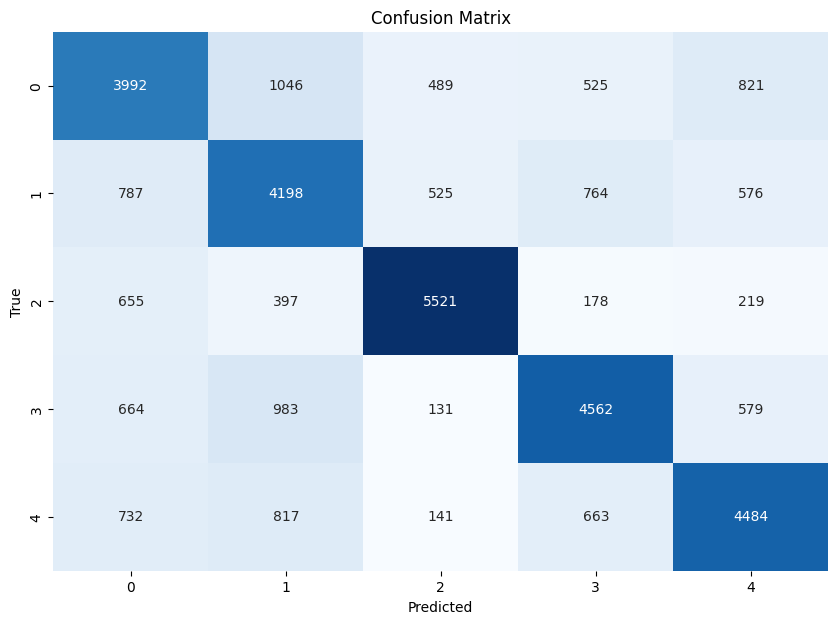

In [32]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
print("\nLoss on test set:", score[0])
print("Accuracy on test set: {:.2f}%".format(score[1] * 100))

# Predict the probabilities
probabilities = model.predict(X_test)

# Convert probabilities to predicted class indices
predicted_classes = np.argmax(probabilities, axis=1)

# Convert one-hot encoded test labels back to integers for confusion matrix
true_classes = np.argmax(y_test, axis=1)

# Define a function to plot confusion matrix
def plot_cmat(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_cmat(true_classes, predicted_classes)
